<a href="https://colab.research.google.com/github/jsroa15/BCG/blob/main/task2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Packages

In [3]:
#Import modules

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Data

In [4]:
#Load Data

df_hist=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BCG/ml_case_training_hist_data.csv')
df_customer=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BCG/ml_case_training_data.csv')
df_churn=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/BCG/ml_case_training_output.csv')

We explore the first rows of every dataset to see how

In [5]:
#Exploring customer data

df_customer.head()

,id,activity_new,campaign_disc_ele,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_first_activ,date_modif_prod,date_renewal,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max
0,48ada52261e7cf58715202705a0451c9,esoiiifxdlbkcsluxmfuacbdckommixw,NaN,lmkebamcaaclubfxadlmueccxoimlema,309275,0,10025,2012-11-07,2016-11-06,NaN,2012-11-07,2015-11-09,NaN,NaN,NaN,NaN,26520.30,10025,0.0,359.29,0.095919,0.088347,58.995952,f,831.8,-41.76,-41.76,1,1732.36,3,ldkssxwpmemidmecebumciepifcamkci,180.000
1,24011ae4ebbe3035111d65fa7c15bc57,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,NaN,NaN,2015-06-23,NaN,NaN,NaN,NaN,0.00,0,0.0,1.78,0.114481,0.098142,40.606701,t,0.0,25.44,25.44,2,678.99,3,lxidpiddsbxsbosboudacockeimpuepw,43.648
2,d29c2c54acc38ff3c0614d0a653813dd,NaN,NaN,NaN,4660,0,0,2009-08-21,2016-08-30,NaN,2009-08-21,2015-08-31,NaN,NaN,NaN,NaN,189.95,0,0.0,16.27,0.145711,0.000000,44.311378,f,0.0,16.38,16.38,1,18.89,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.800
3,764c75f661154dac3a6c254cd082ea7d,NaN,NaN,foosdfpfkusacimwkcsosbicdxkicaua,544,0,0,2010-04-16,2016-04-16,NaN,2010-04-16,2015-04-17,NaN,NaN,NaN,NaN,47.96,0,0.0,38.72,0.165794,0.087899,44.311378,f,0.0,28.60,28.60,1,6.60,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.856
4,bba03439a292a1e166f80264c16191cb,NaN,NaN,lmkebamcaaclubfxadlmueccxoimlema,1584,0,0,2010-03-30,2016-03-30,NaN,2010-03-30,2015-03-31,NaN,NaN,NaN,NaN,240.04,0,0.0,19.83,0.146694,0.000000,44.311378,f,0.0,30.22,30.22,1,25.46,6,kamkkxfxxuwbdslkwifmmcsiusiuosws,13.200


From the above, it's possible to see that there are many missing values in the dataset.

In [6]:
df_hist.head()

,id,price_date,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
0,038af19179925da21a25619c5a24b745,2015-01-01,0.151367,0.0,0.0,44.266931,0.0,0.0
1,038af19179925da21a25619c5a24b745,2015-02-01,0.151367,0.0,0.0,44.266931,0.0,0.0
2,038af19179925da21a25619c5a24b745,2015-03-01,0.151367,0.0,0.0,44.266931,0.0,0.0
3,038af19179925da21a25619c5a24b745,2015-04-01,0.149626,0.0,0.0,44.266931,0.0,0.0
4,038af19179925da21a25619c5a24b745,2015-05-01,0.149626,0.0,0.0,44.266931,0.0,0.0


In [7]:
df_churn.head()

,id,churn
0,48ada52261e7cf58715202705a0451c9,0
1,24011ae4ebbe3035111d65fa7c15bc57,1
2,d29c2c54acc38ff3c0614d0a653813dd,0
3,764c75f661154dac3a6c254cd082ea7d,0
4,bba03439a292a1e166f80264c16191cb,0


The 3 datasets are connected with column ```id```. At first sight the amount of missing data in Churn and Historical data is lower than Customer data







Let's explore the size of every dataset

In [8]:
#Shape of datasets

print('Shape of Customer dataframe (Rows,Columns):',df_customer.shape)
print('Shape of Churn (Rows,Columns):',df_churn.shape)
print('Shape of Historic dataframe (Rows,Columns):',df_hist.shape)

#Number of unique rows by id in Customer

print('\nNumber of unique rows by Id in Customer',df_customer.id.nunique())

Shape of Customer dataframe (Rows,Columns): (16096, 32)
Shape of Churn (Rows,Columns): (16096, 2)
Shape of Historic dataframe (Rows,Columns): (193002, 8)

Number of unique rows by Id in Customer 16096


Based on the previous result, we decided to merge both datasets: Customer and Churn
The idea is to have one dataset to perform better analysis in later stages.

In [9]:
#Merge datasets

df_customer=df_customer.merge(df_churn,on='id')

# General Statistics of datasets

## Data types

Let's explore data types for each dataset.

In [10]:
#Customer data info

df_customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16096 entries, 0 to 16095
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        16096 non-null  object 
 1   activity_new              6551 non-null   object 
 2   campaign_disc_ele         0 non-null      float64
 3   channel_sales             11878 non-null  object 
 4   cons_12m                  16096 non-null  int64  
 5   cons_gas_12m              16096 non-null  int64  
 6   cons_last_month           16096 non-null  int64  
 7   date_activ                16096 non-null  object 
 8   date_end                  16094 non-null  object 
 9   date_first_activ          3508 non-null   object 
 10  date_modif_prod           15939 non-null  object 
 11  date_renewal              16056 non-null  object 
 12  forecast_base_bill_ele    3508 non-null   float64
 13  forecast_base_bill_year   3508 non-null   float64
 14  foreca

In [11]:
#Historic data info

df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193002 entries, 0 to 193001
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            193002 non-null  object 
 1   price_date    193002 non-null  object 
 2   price_p1_var  191643 non-null  float64
 3   price_p2_var  191643 non-null  float64
 4   price_p3_var  191643 non-null  float64
 5   price_p1_fix  191643 non-null  float64
 6   price_p2_fix  191643 non-null  float64
 7   price_p3_fix  191643 non-null  float64
dtypes: float64(6), object(2)
memory usage: 11.8+ MB


From the above we can observe the following outputs:
*   Date colums are with numeric format. They need to be transformed to datetime objects.
*   There are a lot of missing values, specially in Customer dataset.
*   The columns ```campaign_disc_ele``` is a null column, which means that can be deleted later.



## Dataset Statistics

Exploring main statistics in the datasets

In [12]:
#Statistics of Customer dataset

round(df_customer.describe(),1)

,campaign_disc_ele,cons_12m,cons_gas_12m,cons_last_month,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_cons,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,pow_max,churn
count,0.0,16096.0,16096.0,16096.0,3508.0,3508.0,3508.0,3508.0,16096.0,16096.0,15970.0,16096.0,15970.0,15970.0,15970.0,16096.0,16083.0,16083.0,16096.0,16081.0,16096.0,16093.0,16096.0
mean,NaN,194804.4,31911.6,19461.5,335.8,335.8,3837.4,206.8,2370.6,1907.3,1.0,70.3,0.1,0.1,43.5,196.1,22.5,21.5,1.3,218.0,5.0,20.6,0.1
std,NaN,679515.1,177588.5,82356.8,649.4,649.4,5425.7,455.6,4035.1,5257.4,5.2,79.0,0.0,0.0,5.2,494.4,23.7,27.9,1.5,366.7,1.7,21.8,0.3
min,NaN,-125276.0,-3037.0,-91386.0,-364.9,-364.9,-2503.5,0.0,-16689.3,-85627.0,0.0,-243.0,0.0,0.0,-0.1,-9038.2,-525.5,-615.7,1.0,-4149.0,1.0,1.0,0.0
25%,NaN,5906.2,0.0,0.0,0.0,0.0,1158.2,0.0,513.2,0.0,0.0,16.2,0.1,0.0,40.6,0.0,12.0,12.0,1.0,52.0,4.0,12.5,0.0
50%,NaN,15332.5,0.0,901.0,163.0,163.0,2187.2,42.2,1179.2,378.0,0.0,19.4,0.1,0.1,44.3,44.5,21.1,21.0,1.0,119.7,5.0,13.9,0.0
75%,NaN,50221.5,0.0,4127.0,396.2,396.2,4246.6,228.1,2692.1,1994.2,0.0,131.5,0.1,0.1,44.3,218.1,29.6,29.6,1.0,275.8,6.0,19.8,0.0
max,NaN,16097108.0,4188440.0,4538720.0,12566.1,12566.1,81122.6,9682.9,103801.9,175375.0,50.0,2411.7,0.3,0.2,59.4,15042.8,374.6,374.6,32.0,24570.6,16.0,500.0,1.0


The output showed us that consumption and forecast data present negative data, what is really extrange for this analysis. It could be data that are corrupted.

Data are very skewed based on differences between percentile 50 (median) and the mean.

In [13]:
#Statistics of Customer dataset

round(df_hist.describe(),1)

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.0,191643.0,191643.0,191643.0,191643.0,191643.0
mean,0.1,0.1,0.0,43.3,10.7,6.5
std,0.0,0.1,0.0,5.4,12.9,7.8
min,0.0,0.0,0.0,-0.2,-0.1,-0.1
25%,0.1,0.0,0.0,40.7,0.0,0.0
50%,0.1,0.1,0.0,44.3,0.0,0.0
75%,0.2,0.1,0.1,44.4,24.3,16.2
max,0.3,0.2,0.1,59.4,36.5,17.5


From the above, we can conclude that historical data are more centered. The only concern is that fix prices have negative data, which could be corrupted data. 

## Missing Data

We are going to explore missing values in both datasets.

In [14]:
#Missing data in Customer (Looking for NaN's)

pd.DataFrame({'% Missing Values':round(df_customer.isna().sum()/len(df_customer)*100,2)})

,% Missing Values
id,0.00
activity_new,59.30
campaign_disc_ele,100.00
channel_sales,26.21
cons_12m,0.00
cons_gas_12m,0.00
cons_last_month,0.00
date_activ,0.00
date_end,0.01
date_first_activ,78.21


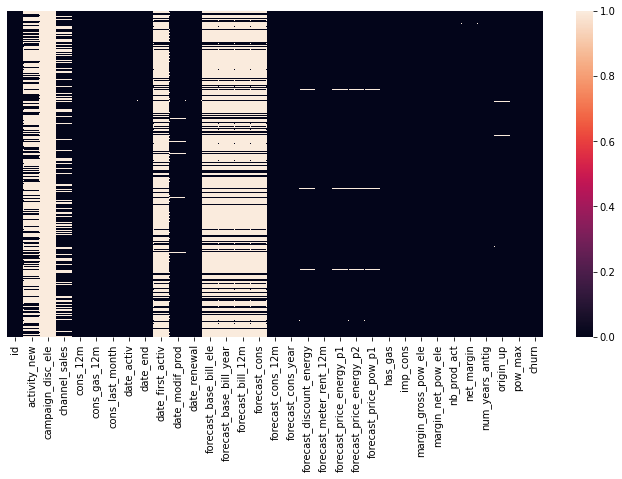

In [15]:
#Now visually

fig, ax = plt.subplots(figsize = (12,6))
sns.heatmap(df_customer.isna(),yticklabels=False)

Some features in customer dataset like ```date_first_activ,forecast_base_bill_ele,forecast_base_bill_year,forecast_bill_12m,forecast_bill_12m``` have more than 70% of missing data. We can drop those features later because of the missing data.

In [16]:
#Missing data in Historical (Looking for NaN's)

pd.DataFrame({'% Missing Values':round(df_hist.isna().sum()/len(df_hist)*100,2)})

,% Missing Values
id,0.0
price_date,0.0
price_p1_var,0.7
price_p2_var,0.7
price_p3_var,0.7
price_p1_fix,0.7
price_p2_fix,0.7
price_p3_fix,0.7


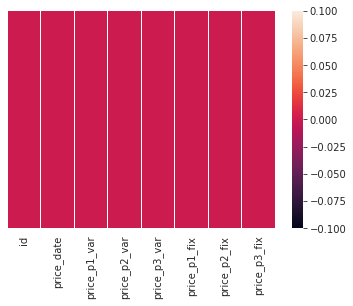

In [72]:
#Now visually

sns.heatmap(df_hist.isna(),yticklabels=False)

The amount of missing data is really short in the historical data set. In case we need we can impute missing values with mean or median.

# Data Visualization

## Categorical Features

Let's explore how churn behave in general with categorical data

0    90.0
1    10.0
Name: churn, dtype: float64 2


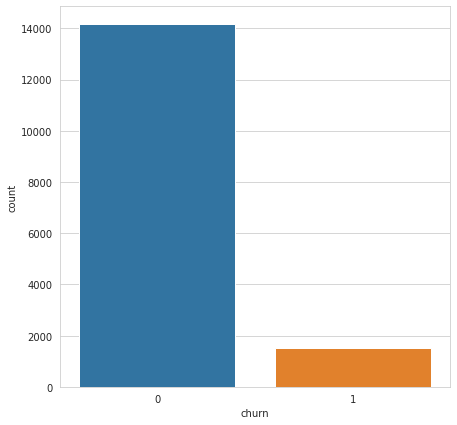

In [71]:
fig, ax = plt.subplots(figsize = (7,7))
print(round(df_customer.churn.value_counts()/len(df_customer)*100),2)
sns.countplot(x='churn',data=df_customer)
plt.show()

At first glimpse, 90% of the customers have retention, while 10% decide to move to a different company.

Now, we are going to explore the acivity 

In [19]:
activity=df_customer.groupby(['activity_new','churn'])['id'].count()
activity2=activity.unstack(level=1).fillna(0).reset_index()
activity2['total_companies']=activity2[0]+activity2[1]
activity2['total_churn(%)']=(activity2[1]/activity2['total_companies']*100)
activity2.sort_values(by='total_churn(%)',ascending=False).head(10)
#sns.countplot(x='activity_new',data=df_customer,hue='churn')

churn,activity_new,0,1,total_companies,total_churn(%)
370,wceaopxmdpccxfmcdpopulcaubcxibuw,0.0,1.0,1.0,100.000000
276,oeacexidmflusdkwuuicmpiaklkxulxm,0.0,1.0,1.0,100.000000
290,opoiuuwdmxdssidluooopfswlkkkcsxf,0.0,1.0,1.0,100.000000
415,xwkaesbkfsacseixxksofpddwfkbobki,0.0,1.0,1.0,100.000000
210,kmlwkmxoocpieebifumobckeafmidpxf,0.0,1.0,1.0,100.000000
173,ikiucmkuisupefxcxfxxulkpwssppfuo,0.0,1.0,1.0,100.000000
381,wkwdccuiboaeaalcaawlwmldiwmpewma,0.0,1.0,1.0,100.000000
298,pfcocskbxlmofswiflsbcefcpufbopuo,0.0,2.0,2.0,100.000000
80,cwouwoubfifoafkxifokoidcuoamebea,1.0,2.0,3.0,66.666667
362,upwbxpxmkkbicbamfusaxdloflofisii,1.0,1.0,2.0,50.000000


In [20]:
activity2.sort_values(by=['total_companies'],ascending=False).head(10)

churn,activity_new,0,1,total_companies,total_churn(%)
17,apdekpcbwosbxepsfxclislboipuxpop,1484.0,93.0,1577.0,5.897273
200,kkklcdamwfafdcfwofuscwfwadblfmce,384.0,38.0,422.0,9.004739
220,kwuslieomapmswolewpobpplkaooaaew,200.0,30.0,230.0,13.043478
146,fmwdwsxillemwbbwelxsampiuwwpcdcb,187.0,32.0,219.0,14.611872
65,ckfxocssowaeipxueikxcmaxdmcduxsa,176.0,13.0,189.0,6.878307
79,cwofmuicebbcmiaaxufmfimpowpacobu,110.0,12.0,122.0,9.836066
69,cluecxlameloamldmasudocsbmaoamdw,105.0,14.0,119.0,11.764706
390,wxemiwkumpibllwklfbcooafckufkdlm,102.0,17.0,119.0,14.285714
330,sfisfxfcocfpcmckuekokxuseixdaoeu,78.0,5.0,83.0,6.024096
329,sffadmsbuamddwapeumdfibkmpkdicmc,69.0,6.0,75.0,8.000000


From the above, we can conclude that activity doesn't has a clear relation with churn.

Let's explore the channel sales with churn

In [21]:
nose=df_customer.groupby(['channel_sales','churn']).size().unstack(fill_value=0)
nose

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,4,0
ewpakwlliwisiwduibdlfmalxowmwpci,884,82
fixdbufsefwooaasfcxdxadsiekoceaa,2,0
foosdfpfkusacimwkcsosbicdxkicaua,6455,922
lmkebamcaaclubfxadlmueccxoimlema,1957,116
sddiedcslfslkckwlfkdpoeeailfpeds,12,0
usilxuppasemubllopkaafesmlibmsdf,1294,150


In [22]:
nose=nose.div(nose.sum(axis=1),axis=0)*100
nose

churn,0,1
channel_sales,,
epumfxlbckeskwekxbiuasklxalciiuu,100.000000,0.000000
ewpakwlliwisiwduibdlfmalxowmwpci,91.511387,8.488613
fixdbufsefwooaasfcxdxadsiekoceaa,100.000000,0.000000
foosdfpfkusacimwkcsosbicdxkicaua,87.501694,12.498306
lmkebamcaaclubfxadlmueccxoimlema,94.404245,5.595755
sddiedcslfslkckwlfkdpoeeailfpeds,100.000000,0.000000
usilxuppasemubllopkaafesmlibmsdf,89.612188,10.387812


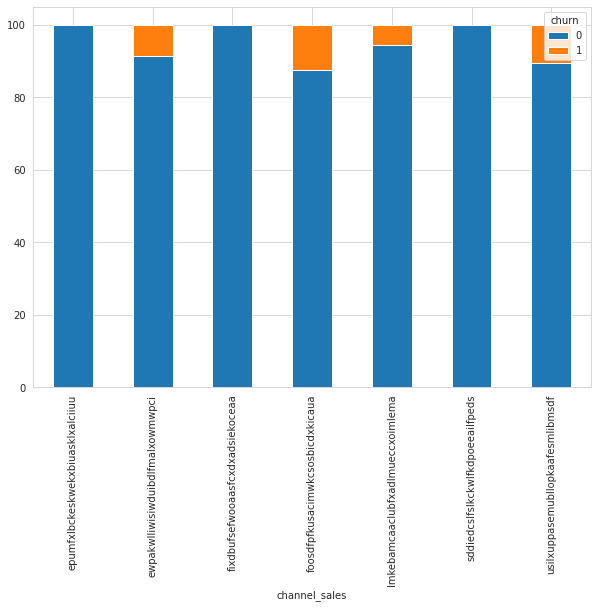

In [70]:
#fig, ax = plt.subplots(figsize = (7,7))
nose.plot(kind='bar',stacked=True,figsize=(10,7),)
plt.show()

We can see that Channel Sales  doesn't have a relation with churn. None of the channel sales provide more than 10% of churn. Also, it's important to mention that in Channel Sales we only have 75% of the data.

Type of contract

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

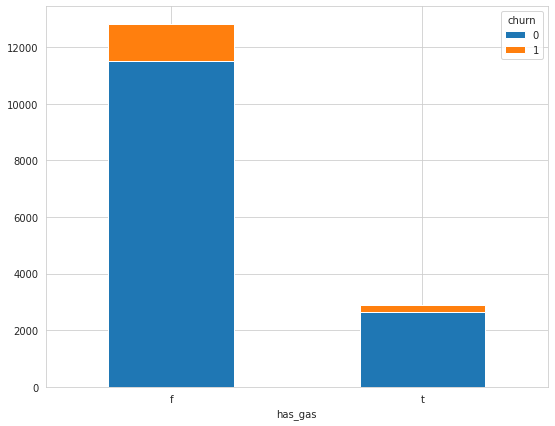

In [78]:
gas=df_customer[['id','churn','has_gas']]

gas=gas.groupby(['has_gas','churn'])['id'].count().unstack()

gas.plot(kind='bar',stacked=True,figsize=(9,7))

plt.xticks(rotation=0)


In [25]:
#Same result with percentages

round(gas.div(gas.sum(axis=1),axis=0)*100,2)

churn,0,1
has_gas,,
f,89.64,10.36
t,92.11,7.89


We can see that customers that have gas dont't provide a great amount of churn. Customers with no gas have more churn, but it's reasonable. 

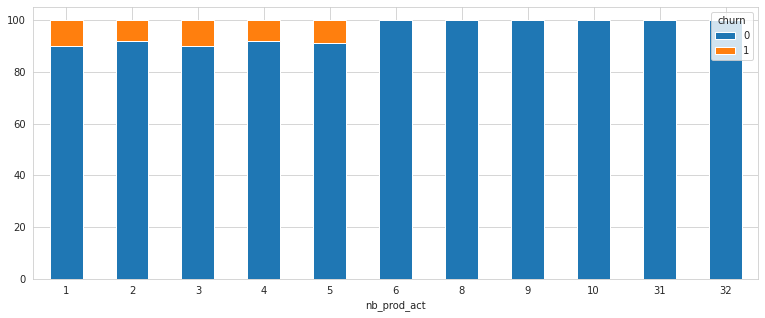

In [79]:
products=df_customer[['id','nb_prod_act','churn']]
products=df_customer.groupby(['nb_prod_act','churn'])['id'].count().unstack(fill_value=0)
products=round(products.div(products.sum(axis=1),axis=0)*100,2)
products.plot(kind='bar',stacked=True,figsize=(13,5))
plt.xticks(rotation=0)
plt.show()

## Numeric Features

Now, we are going to explore the numerical features to determine if how churn is related with numeric features

In [61]:
#Extract numeric features

numeric_features=[x for x in df_customer.columns if df_customer[x].dtype=='float64' or df_customer[x].dtype=='int64' and x!='churn' and x!='nb_prod_act'] 

In [62]:
numeric_features

['cons_12m',
 'cons_gas_12m',
 'cons_last_month',
 'forecast_cons_12m',
 'forecast_cons_year',
 'forecast_discount_energy',
 'forecast_meter_rent_12m',
 'forecast_price_energy_p1',
 'forecast_price_energy_p2',
 'forecast_price_pow_p1',
 'imp_cons',
 'margin_gross_pow_ele',
 'margin_net_pow_ele',
 'net_margin',
 'num_years_antig',
 'pow_max']

In [29]:
def plotting_numerical(data,rows,cols,x_list,size,hue):
  '''Plot numerical data in subplots using Seaborn
    Parameters
    --------------
      data:Data frame with data
      rows:Number of rows in subplot
      cols:Number of columns in subplot
      x_list:List with features names
      size:Tupple with size of plot
    
  '''
  
  sns.set_style("whitegrid")

  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.histplot(data=data,ax=axes[i,j],x=x_list[pos],bins=50,hue=hue,multiple="stack")
      pos+=1

  return(plt.show())

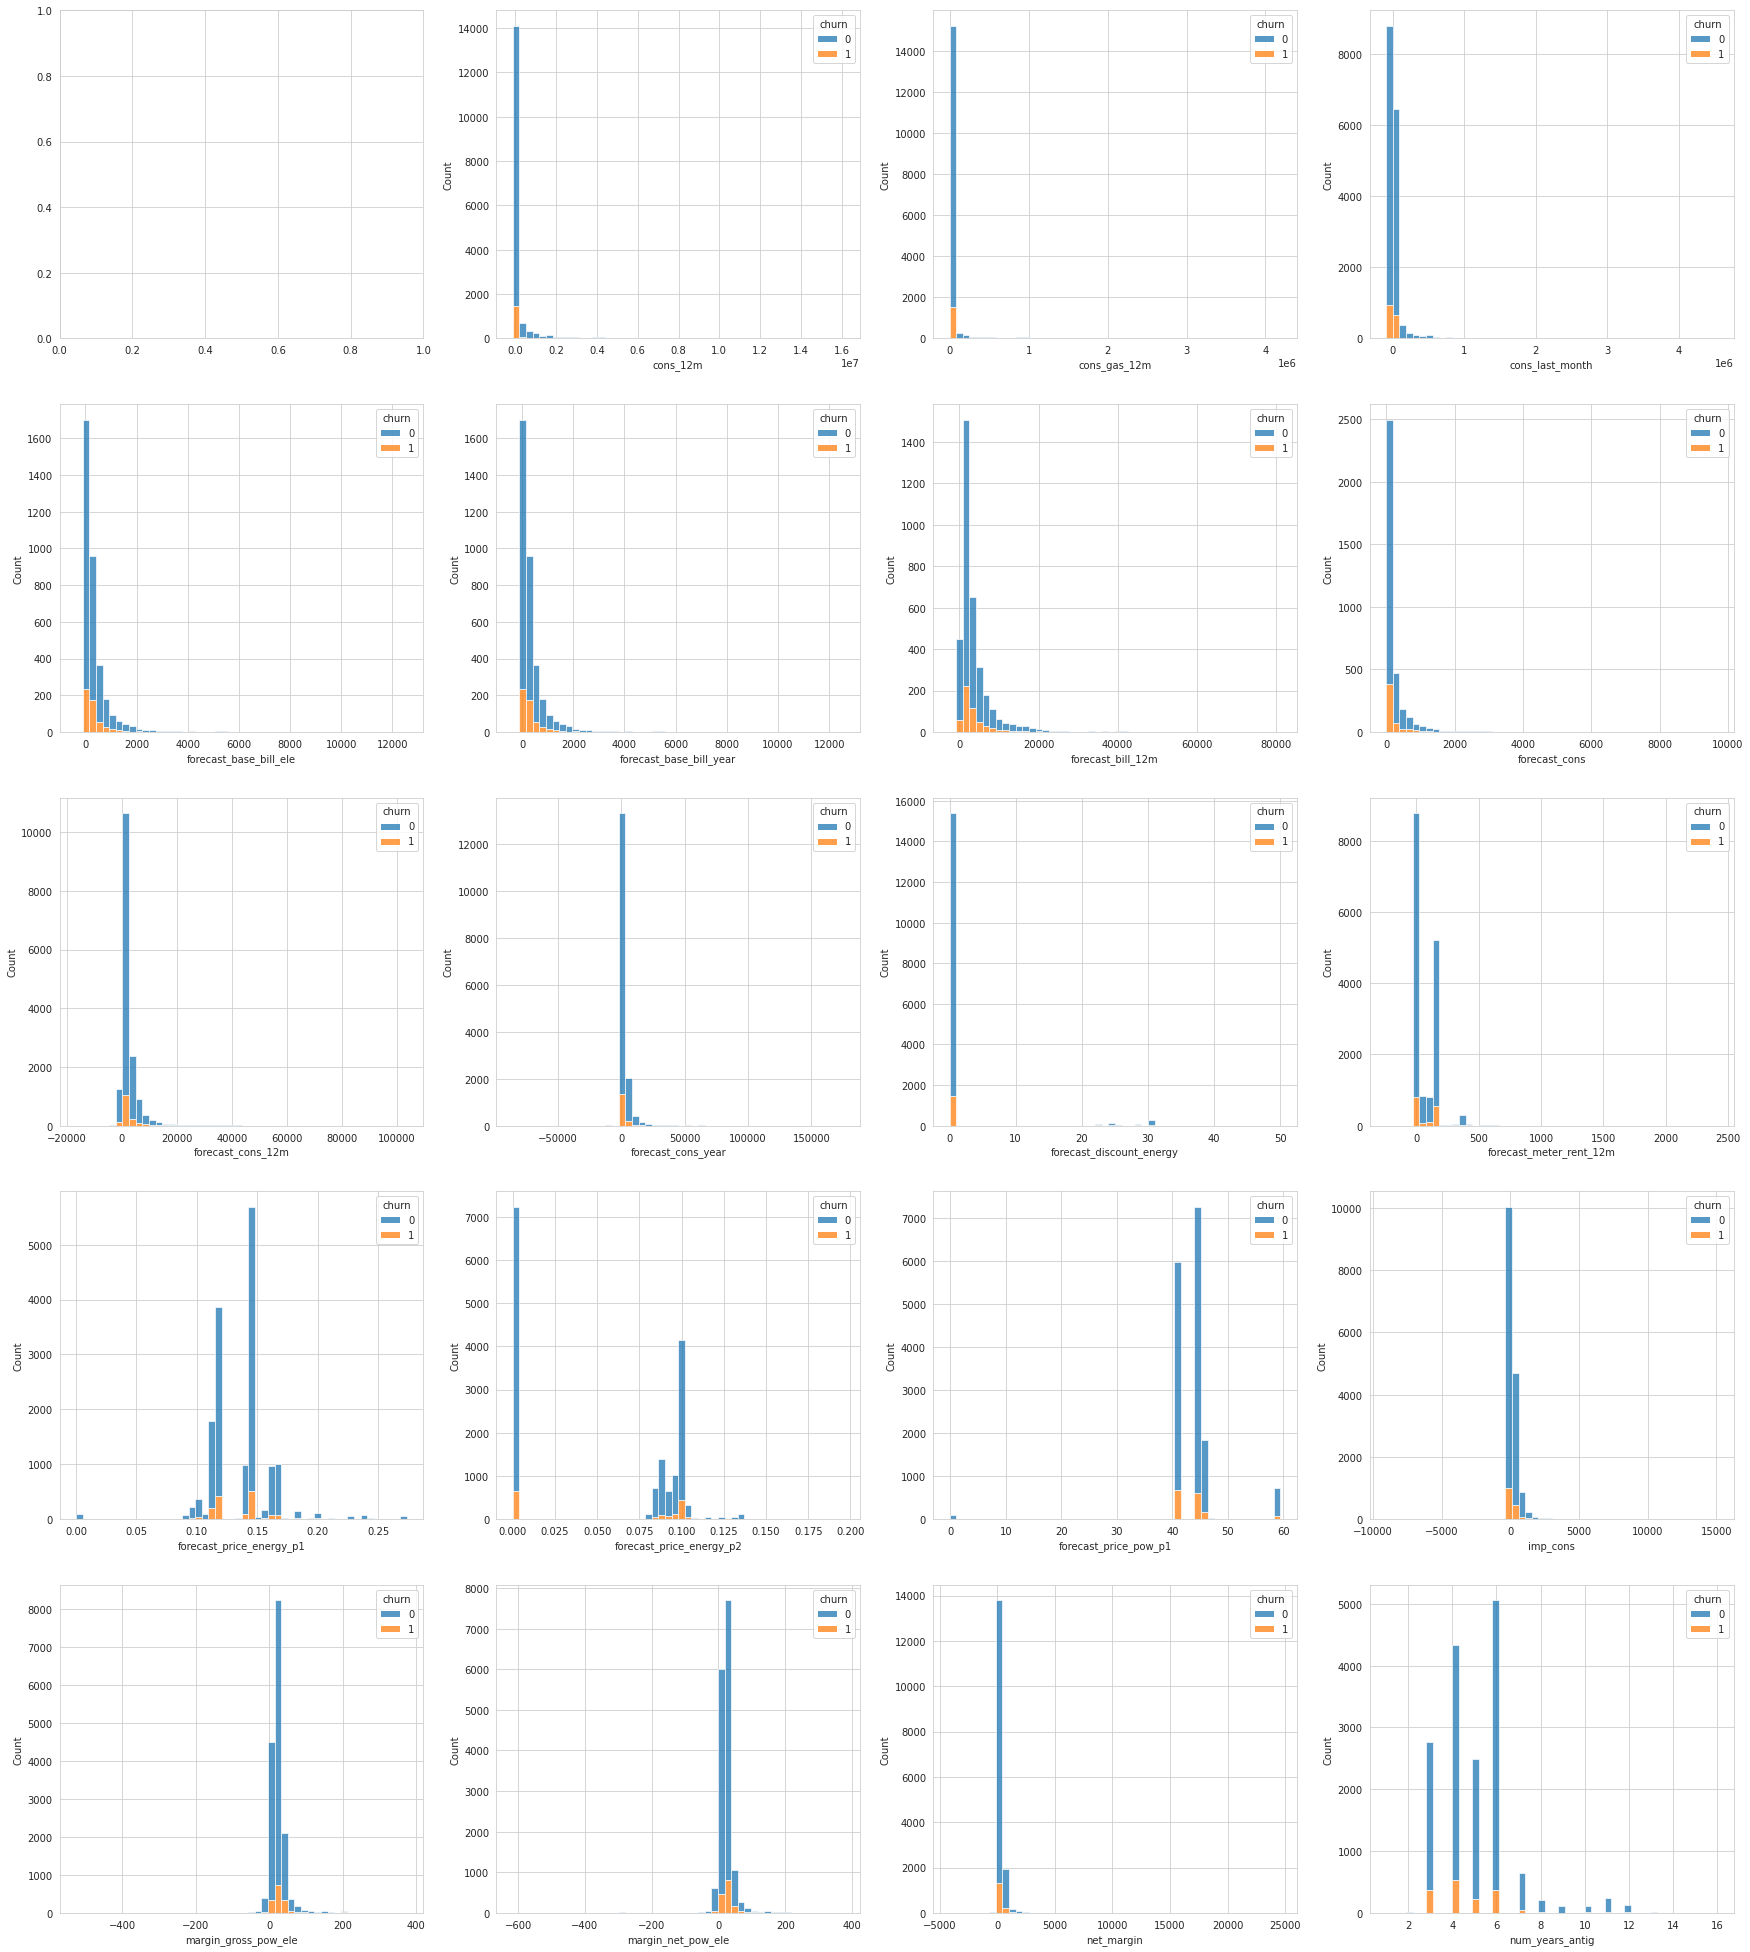

In [30]:
plotting_numerical(df_customer,5,4,numeric_features,(30,35),hue='churn')

Based on the previous result we can conclude that numeric data is highly skewed to right. The histograms support the initial analysis with percentiles

Exploring some correlations

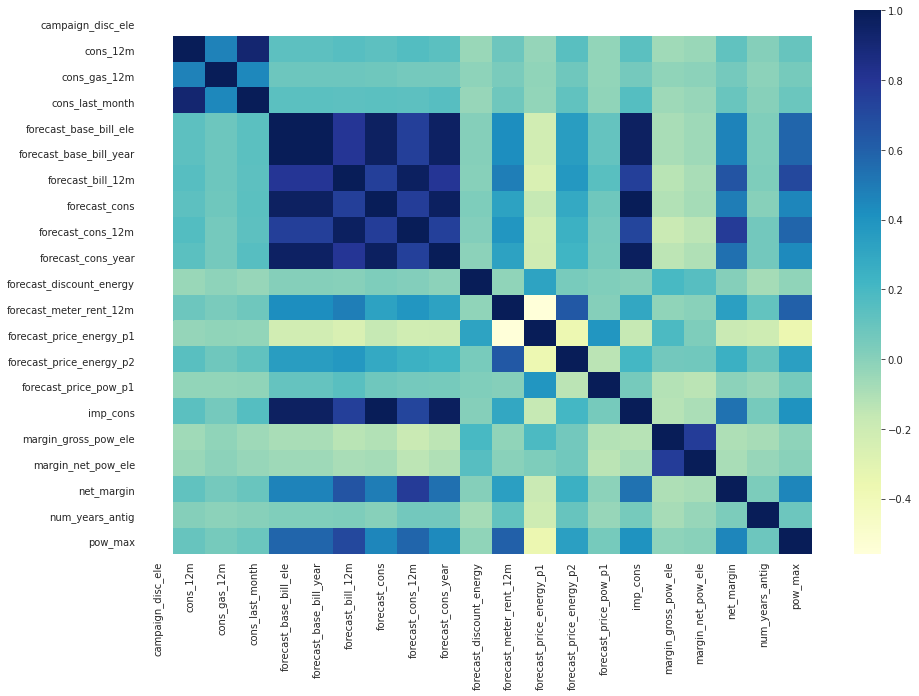

In [31]:
plt.figure(figsize=(15,10))
sns.heatmap(df_customer[numeric_features].corr(),cmap="YlGnBu")

The heatmap with correlations shows that features of forecast and consumption are highly correlated with themselves

Now, we can explore how data is skewed through boxplots

In [60]:
#Create a function to plot boxplots of numeric features

def plotting_boxplots(data,rows,cols,x_list,size):
  '''Plot numerical data in subplots using Seaborn
    Parameters
    --------------
      data:Data frame with data
      rows:Number of rows in subplot
      cols:Number of columns in subplot
      x_list:List with features names
      size:Tupple with size of plot
    
  '''
  
  sns.set_style("whitegrid")

  pos=0
  f, axes = plt.subplots(nrows=rows, ncols=cols,figsize=size)
  for i in range(0,rows):
    for j in range(0,cols):
      
      sns.boxplot(data=data,ax=axes[i,j],y=x_list[pos])
      
      pos+=1

  return(plt.show())

IndexError: ignored

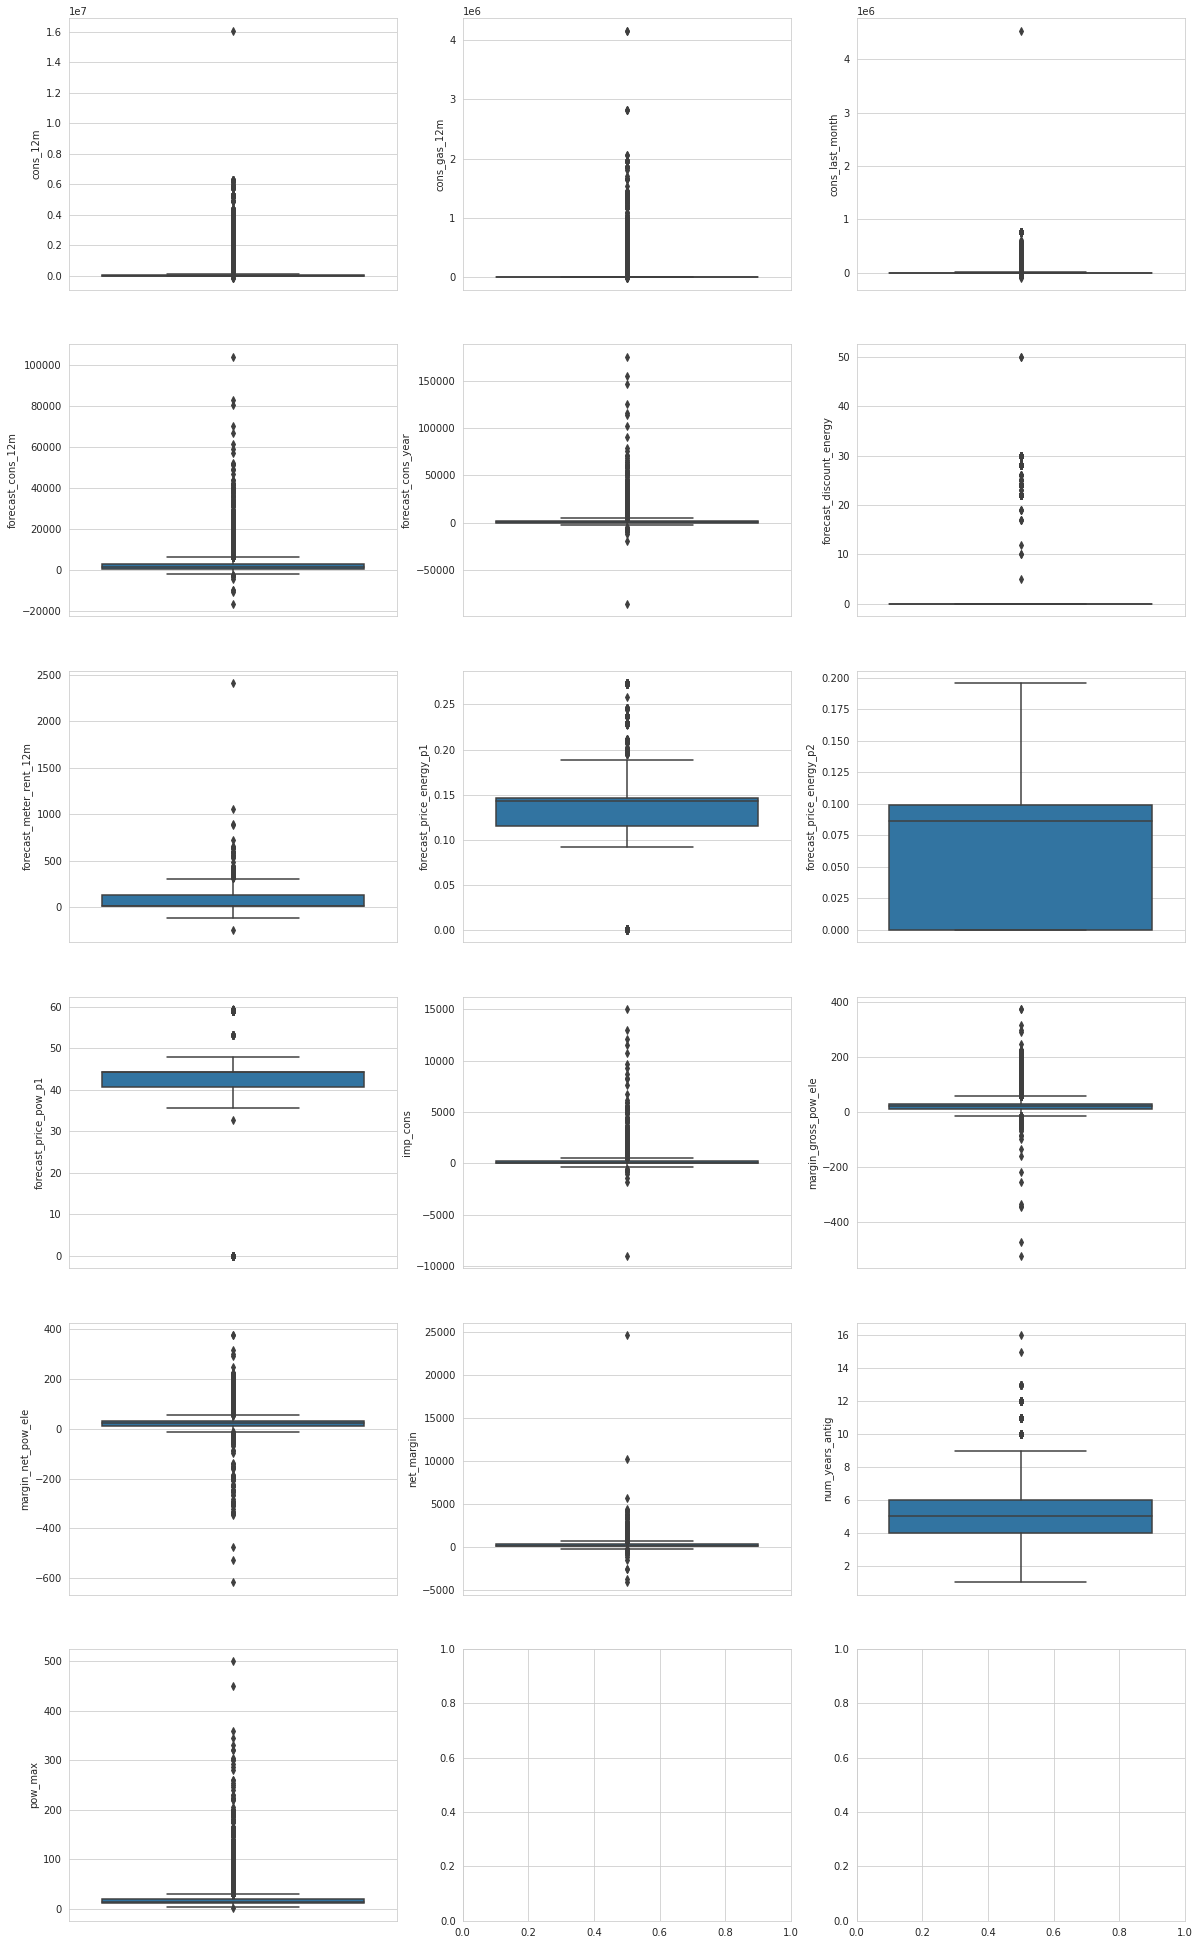

In [64]:
plotting_boxplots(df_customer,6,3,numeric_features,(20,35))

# Data Cleaning

## Fixing data types

Based on the previous results, dates are not with the right data type, so we are going to convert dates from text to datetime objects

In [32]:
#Changing datatypes

to_convert=['date_activ','date_end','date_first_activ','date_modif_prod','date_renewal']

for i in to_convert:
  df_customer[i]=pd.to_datetime(df_customer[i],errors='coerce',format="%Y-%m-%d")


In [33]:
df_customer.date_activ

0       2012-11-07
1       2013-06-15
2       2009-08-21
3       2010-04-16
4       2010-03-30
           ...    
16091   2012-05-24
16092   2012-08-27
16093   2012-02-08
16094   2012-08-30
16095   2009-12-18
Name: date_activ, Length: 16096, dtype: datetime64[ns]

In [93]:
#Changing datatypes in historic data

df_hist.columns

df_hist['price_date']=pd.to_datetime(df_hist['price_date'],errors='coerce',format="%Y-%m-%d")

df_hist.price_date

0        2015-01-01
1        2015-02-01
2        2015-03-01
3        2015-04-01
4        2015-05-01
            ...    
192997   2015-08-01
192998   2015-09-01
192999   2015-10-01
193000   2015-11-01
193001   2015-12-01
Name: price_date, Length: 191643, dtype: datetime64[ns]

## Missing Data

We are going to drop columns that have more than 60% of missing data

In [34]:
#Exploring Missing Values

missing=pd.DataFrame({'% Missing Values':round(df_customer.isna().sum()/len(df_customer)*100,2)})
missing=missing[missing['% Missing Values']>60]
to_drop=missing.index.to_list()

df_customer.drop(to_drop,axis=1,inplace=True)

#Checking again

df_customer.columns

Index(['id', 'activity_new', 'channel_sales', 'cons_12m', 'cons_gas_12m',
       'cons_last_month', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m', 'forecast_cons_year',
       'forecast_discount_energy', 'forecast_meter_rent_12m',
       'forecast_price_energy_p1', 'forecast_price_energy_p2',
       'forecast_price_pow_p1', 'has_gas', 'imp_cons', 'margin_gross_pow_ele',
       'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'origin_up', 'pow_max', 'churn'],
      dtype='object')

Now that we have dropped the columns with missing data, the remaining missing data is very small. We can delete rows with missing values in both datasets. But, we are going ```activy_new``` and ```channel_sales``` because those features have more than 20% of missing data.



In [46]:
missing=pd.DataFrame({'% Missing Values':round(df_customer.isna().sum()/len(df_customer)*100,2)})
missing=missing[(missing['% Missing Values']>0)&(missing['% Missing Values']<20)]
to_drop=missing.index.to_list()
to_drop

df_customer.dropna(subset=to_drop,inplace=True)

In [47]:
#Checking new shape of customer dataset

len(df_customer)

15674

In [51]:
#Now with historic dataset

to_drop=[x for x in df_hist.columns if x!='id' and x!='price_date']

df_hist.dropna(subset=to_drop,inplace=True)

#Checking shape of historic dataset

df_hist.shape

(191643, 8)

## Duplicates

We are going to show if customer data has duplicates.

In [67]:
df_customer[df_customer.duplicated()]

,id,activity_new,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,forecast_cons_year,forecast_discount_energy,forecast_meter_rent_12m,forecast_price_energy_p1,forecast_price_energy_p2,forecast_price_pow_p1,has_gas,imp_cons,margin_gross_pow_ele,margin_net_pow_ele,nb_prod_act,net_margin,num_years_antig,origin_up,pow_max,churn


As we can see, there's no duplicated data on customer dataset.

For the historic dataset, it's suposed to find duplicated data because of its structure, given that the dataset has data for every customer every month of the year.

## Corrupted Data

We have some negative data in both datasets, let's explore how we can deal with that.

In [80]:
df_hist.describe()

,price_p1_var,price_p2_var,price_p3_var,price_p1_fix,price_p2_fix,price_p3_fix
count,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000,191643.000000
mean,0.140991,0.054412,0.030712,43.325546,10.698201,6.455436
std,0.025117,0.050033,0.036335,5.437952,12.856046,7.782279
min,0.000000,0.000000,0.000000,-0.177779,-0.097752,-0.065172
25%,0.125976,0.000000,0.000000,40.728885,0.000000,0.000000
50%,0.146033,0.085483,0.000000,44.266930,0.000000,0.000000
75%,0.151635,0.101780,0.072558,44.444710,24.339581,16.226389
max,0.280700,0.229788,0.114102,59.444710,36.490692,17.458221


In the hist data we are going to replae negative data with median.



In [88]:
df_hist.loc[df_hist['price_p1_fix']<0,'price_p1_fix']=df_hist.price_p1_fix.median()
df_hist.loc[df_hist['price_p2_fix']<0,'price_p2_fix']=df_hist.price_p2_fix.median()